In [5]:
import sys
sys.path.append('../')

import meta_dataloader.TCGA

import models.mlp, models.gcn
import numpy as np
import data.gene_graphs
import collections
import sklearn.metrics
import sklearn.model_selection
import pandas as pd
%load_ext autoreload
%autoreload 2

In [5]:
import torch
torch.cuda.is_available()

True

### Reading results

In [4]:
import pickle
results = pickle.load(open( "../experiments/results/res_1000_D_ER.pkl", "rb"), encoding='latin1')
results[results.acc > 0.47] #& (results.acc > 0.7) & (results.seed != 4), 'num_genes', 'num_layer', 'prepool_extralayers'
grouped_df = results[(results.train_size==100)].groupby(['model', 'graph', 'num_genes'])['acc']
grouped_df.describe()


In [3]:
import pickle
results = pickle.load(open( "../experiments/results/fs_MB_A_PAM50.pkl", "rb"), encoding='latin1')
results#[results.acc > 0.8]& (results.acc > 0.7) & (results.seed != 4)
grouped_df = results[(results.train_size==1500)& (results.num_genes>10000) & (results.model=='GCN_noemb_lay1_chan64_dropout_agg_hierarchical_lr=0.0005')].groupby(['model', 'graph', 'num_genes'])
grouped_df.describe()


acc  \
                                                                                           count   
model                                              graph                         num_genes         
GCN_noemb_lay1_chan64_dropout_agg_hierarchical_... ontology_dl2vec_10_randomized 16000       3.0   
                                                                                 20000       3.0   
                                                   ontology_dl2vec_30            14308       6.0   
                                                                                 16000       3.0   
                                                                                 20000       3.0   
                                                   ontology_el_10                16000       3.0   
                                                                                 20000       3.0   
                                                   ontology_el_30                11730       3.0   
                                                                                 16000       3.0   
                                                                                 20000       3.0   
                                                   ontology_el_30_randomized     16000       3.0   

                                                                                                      \
                                                                                                mean   
model                                              graph                         num_genes             
GCN_noemb_lay1_chan64_dropout_agg_hierarchical_... ontology_dl2vec_10_randomized 16000      0.822500   
                                                                                 20000      0.799167   
                                                   ontology_dl2vec_30            14308      0.823750   
                                                                                 16000      0.815000   
                                                                                 20000      0.803333   
                                                   ontology_el_10                16000      0.803333   
                                                                                 20000      0.820833   
                                                   ontology_el_30                11730      0.801667   
                                                                                 16000      0.812500   
                                                                                 20000      0.819167   
                                                   ontology_el_30_randomized     16000      0.783333   

                                                                                                      \
                                                                                                 std   
model                                              graph                         num_genes             
GCN_noemb_lay1_chan64_dropout_agg_hierarchical_... ontology_dl2vec_10_randomized 16000      0.016394   
                                                                                 20000      0.005204   
                                                   ontology_dl2vec_30            14308      0.017011   
                                                                                 16000      0.015612   
                                                                                 20000      0.026732   
                                                   ontology_el_10                16000      0.037859   
                                                                                 20000      0.011815   
                                                   ontology_el_30                11730      0.022546   
                                                                                 16000     

In [44]:
# Statistical significance testing

from scipy import stats
results_gcn = list(results[(results.train_size==1500)& 
        (results.num_genes==16000)&
        (results.model=='GCN_noemb_lay1_chan32_dropout_agg_hierarchical_prepool2')&
        (results.graph=='ontology_el_10')].acc)[:3]
results_mlp = list(results[(results.train_size==1500)& 
        (results.num_genes==20000)&
        (results.model=='MLP_lay2_chan64_lr.0.001')&
        (results.graph=='ontology_el_10')].acc)
print(results_gcn, results_mlp)
print(stats.ttest_ind(results_gcn,results_mlp))

[0.785, 0.7275, 0.715] [0.6625, 0.63, 0.64]
Ttest_indResult(statistic=4.166724854124048, pvalue=0.01406839981975207)


In [192]:
# Hyperparameter search results

import pickle
results = pickle.load(open( "../experiments/results/MB_PAM50_hpsearch_50.pkl", "rb"), encoding='latin1')
results[(results.channels < 1000) & (results.acc > 0.66)]

,auc,acc,gene,model,graph,num_genes,seed,train_size,lr,channels,embedding,num_layer,prepool_extralayers
1,NaN,0.6675,NaN,MLP,,24368,2,50,0.0001,256,0,1,0
3,NaN,0.6800,NaN,MLP,,24368,2,50,0.0010,64,0,1,0
8,NaN,0.6875,NaN,MLP,,24368,2,50,0.0010,64,0,3,0
10,NaN,0.6675,NaN,MLP,,24368,2,50,0.0001,256,0,1,0
53,NaN,0.6700,NaN,GCN_dropout,ontology_el_30,2000,2,50,0.0010,16,16,1,0
55,NaN,0.6650,NaN,GCN_dropout,ontology_el_30,2000,2,50,0.0010,16,16,2,0
59,NaN,0.6825,NaN,GCN_dropout,ontology_el_30,2000,2,50,0.0010,16,128,1,0
60,NaN,0.6950,NaN,GCN_dropout,ontology_el_30,2000,2,50,0.0010,32,128,1,0
63,NaN,0.6675,NaN,MLP,,24368,2,50,0.0001,256,0,1,0
65,NaN,0.6800,NaN,MLP,,24368,2,50,0.0010,128,0,1,0


## Loadng data

In [2]:
path = "../data/MBdata_all.csv"
df = pd.read_csv(path)

/auto/homes/mt675/gene-graph-conv-onto/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15,16,18,20,21,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df[df.Pam50Subtype != '?']

features = df.filter(regex='^GE.*')
features = features.astype('float64')
print(features.shape)

target = df.pop('Pam50Subtype')
pam50_lables = {
    'Normal': 0,
    'LumA': 1,
    'LumB': 2,
    'Basal': 3,
    'Her2': 4
}
target = target.apply(lambda x: pam50_lables[x])

(1974, 24368)


In [4]:
def normalize(df):
    r = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if max_value != min_value:
          r[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return r

In [5]:
features = df.filter(regex='^GE.*')
features = normalize(features)
features.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [5]:
# tasks = meta_dataloader.TCGA.TCGAMeta(download=True, 
#                                       min_samples_per_class=10, 
#                                       gene_symbol_map_file="../genenames_code_map_Feb2019.txt")
#task = tasks[113]

In [7]:
print(features.shape)
print(target.shape)
print(collections.Counter(target))

(1974, 24368)
(1974,)
Counter({1: 718, 2: 488, 3: 329, 4: 240, 0: 199})


In [8]:
features = features.rename(columns={g: g[3:] for g in list(features.columns)})

In [9]:
features

,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,...,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,FAM71A
0,0.486598,0.125649,0.619682,0.618257,0.161650,0.180766,0.631249,0.693042,0.255387,0.106132,...,0.199776,0.264965,0.390627,0.205741,0.057925,0.229274,0.555108,0.366183,0.235229,0.477744
1,0.188222,0.086033,0.451753,0.470318,0.239702,0.218925,0.763729,0.742210,0.163796,0.457753,...,0.183031,0.395957,0.144121,0.220022,0.076433,0.222285,0.461060,0.460449,0.338137,0.498676
2,0.248916,0.053254,0.494157,0.225866,0.245788,0.065128,0.720808,0.632087,0.152507,0.203268,...,0.296255,0.456653,0.230277,0.087725,0.058480,0.291315,0.415211,0.209486,0.495406,0.350233
3,0.308160,0.065837,0.478817,0.431824,0.354755,0.101537,0.664368,0.585415,0.157457,0.328480,...,0.209875,0.590185,0.406000,0.247921,0.086111,0.116720,0.530568,0.501829,0.382813,0.482842
4,0.384302,0.168407,0.432853,0.724642,0.292087,0.484112,0.811565,0.327066,0.125803,0.290794,...,0.206387,0.455154,0.330509,0.125546,0.023117,0.090440,0.506549,0.128028,0.423130,0.449957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,0.320625,0.193329,0.364908,0.528450,0.140736,0.296393,0.553562,0.571241,0.251107,0.344500,...,0.269788,0.297709,0.403654,0.178507,0.081385,0.091835,0.303689,0.356562,0.319260,0.091296
1976,0.440087,0.265762,0.258116,0.618739,0.254932,0.154250,0.716667,0.523617,0.286601,0.279614,...,0.186551,0.220180,0.495592,0.282742,0.061938,0.175899,0.428577,0.373063,0.180651,0.444691
1977,0.564765,0.355214,0.516906,0.439810,0.160427,0.774993,0.486423,0.386237,0.160633,0.234553,...,0.212928,0.442610,0.373668,0.293595,0.075500,0.150287,0.659087,0.324735,0.440096,0.575288
1978,0.691143,0.244498,0.270222,0.368561,0.121129,0.296981,0.779151,0.587581,0.155601,0.137478,...,0.266857,0.407724,0.405649,0.255425,0.055774,0.213559,0.510257,0.170758,0.387969,0.408839


## Plot expression values of certain genes against target

In [ ]:
import matplotlib, matplotlib.pyplot as plt
import seaborn as sns

In [140]:
MB_data = pd.read_csv(path)
MB_data = MB_data[MB_data.Pam50Subtype != '?']

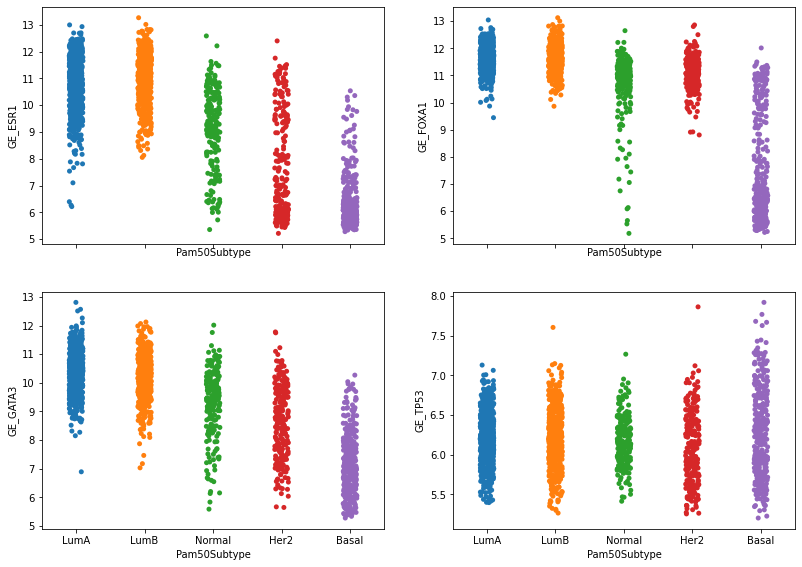

In [153]:
plt.rcParams['figure.figsize'] = (13.5, 9.6)
fig, axs = plt.subplots(2,2, sharex=True, sharey=False)

search_genes = [ "ESR1", "FOXA1", "GATA3", "TP53"] #, "RPL13"] #, "IL5"]
for i, plot_gene in enumerate(search_genes):
    j = int(i/2)
    k = i%2

    tmp = pd.DataFrame(MB_data["GE_" + plot_gene])
    tmp.loc[:,'Pam50Subtype'] = MB_data.loc[list(tmp.index), 'Pam50Subtype']
#     axs[j][k].figure(figsize=(6,4))
    sns.stripplot(y="GE_" + plot_gene,x='Pam50Subtype', data=tmp, ax=axs[j][k])
plt.show()

## Run models

In [21]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features, 
                                                                            target.to_numpy(), 
                                                                            stratify=target.to_numpy(),
                                                                            train_size=300,
                                                                            test_size=100,
                                                                            shuffle=True,
                                                                            random_state=0
                                                                             )
X_test, X_valid, y_test, y_valid = sklearn.model_selection.train_test_split(X_test, 
                                                                            y_test, 
                                                                            stratify=y_test,
                                                                            train_size=50,
                                                                            test_size=50,
                                                                            shuffle=True,
                                                                            random_state=0
                                                                           )

In [11]:
collections.Counter(y_train)

Counter({1: 109, 3: 50, 0: 30, 4: 37, 2: 74})

In [185]:
for lr in [0.000001,0.00001,0.0001,0.001,0.01]:
    for seed in [0,1]:
        for num_layer in [1,2,3]:
            model = models.mlp.MLP(name="MLP_lay1_chan256",
                                   num_layer=num_layer, 
                                   channels=256, 
                                   lr=lr,
                                   patience=50,
                                   cuda=True,
                                   metric=sklearn.metrics.accuracy_score,
                                   verbose=False,
                                   seed=seed)

            model.fit(X_train, y_train)

            y_valid_pred = model.predict(X_valid)
            print(seed, lr, num_layer, sklearn.metrics.accuracy_score(y_valid, np.argmax(y_valid_pred,axis=1)))


TypeError: super(type, obj): obj must be an instance or subtype of type

In [13]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
print(sklearn.metrics.accuracy_score(y_test, y_pred))


0.36


In [14]:
# graph = data.gene_graphs.GeneManiaGraph()
graph = data.gene_graphs.OntologyGraph(neighbors=50, embeddings_name='el')
adj = graph.adj()

 loading from cache file/auto/homes/mt675/gene-graph-conv-onto/data/graphs/ontology_el_50.adjlist.gz


In [15]:
print("edges:", graph.nx_graph.number_of_edges())
print("nodes:", graph.nx_graph.number_of_nodes())

edges: 499941
nodes: 13866


In [16]:
# import gc
# gc.collect()

In [18]:
gene = 'ESR1'
num_genes = 1000
neighbors = graph.bfs_sample_neighbors(gene, num_genes)
intersection_nodes = np.intersect1d(features.columns, neighbors.nodes)

In [24]:
set(neighbors.nodes) - set(intersection_nodes)

{'A2ML1',
 'AC005702.1',
 'AC005726.1',
 'AC006486.1',
 'AC092143.1',
 'AC113554.1',
 'ACKR1',
 'AGO3',
 'AGO4',
 'AOPEP',
 'AQP2',
 'AVPR2',
 'BICRA',
 'CASR',
 'CCKAR',
 'CCN2',
 'CCT4',
 'CGB8',
 'CHRNB4',
 'CRTC3',
 'CRYBB2',
 'CXCL8',
 'CYSLTR2',
 'DENND6A',
 'DPF3',
 'DPPA4',
 'DZANK1',
 'EBI3',
 'ELP5',
 'EMSY',
 'F2',
 'F2R',
 'F2RL3',
 'FBXO45',
 'FKBP1C',
 'GLRA4',
 'GLYATL1',
 'GPER1',
 'GRK2',
 'H2AC11',
 'H2AC18',
 'H2AC8',
 'H2BC1',
 'H2BC10',
 'H2BC11',
 'H2BC12',
 'H2BC13',
 'H2BC15',
 'H2BC18',
 'H2BC21',
 'H2BC5',
 'H3-4',
 'H3C10',
 'H3C15',
 'HELZ2',
 'HTR2A',
 'INHBB',
 'INTS13',
 'KDM4E',
 'KLK2',
 'KMT5A',
 'LPAR5',
 'LRRFIP1',
 'MACROH2A1',
 'MACROH2A2',
 'MAP3K20',
 'MARCHF5',
 'MDFIC',
 'MED14',
 'MED20',
 'MEGF6',
 'MFNG',
 'MKNK1',
 'MOB1A',
 'MOB4',
 'MRE11',
 'MSX1',
 'NDFIP1',
 'NECTIN1',
 'NECTIN3',
 'NECTIN4',
 'NOTCH4',
 'NPAP1',
 'NPM1',
 'NPS',
 'NRDC',
 'NSMCE3',
 'NTMT1',
 'PAX5',
 'PLGRKT',
 'POTEI',
 'POTEJ',
 'PP2D1',
 'PPP5D1',
 'PSME3IP1',
 'P

In [22]:
X_train = X_train[list(intersection_nodes)].copy()
X_valid = X_valid[list(intersection_nodes)].copy()
X_test = X_test[list(intersection_nodes)].copy()

In [23]:
X_train.shape

(300, 885)

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [160]:
for nl in [1,2,3]:
    for lr in [0.00001,0.0001]:
        for seed in [0,1]:
            model = models.gcn.GCN(name="GCN_lay3_chan64_emb32_dropout_agg_hierarchy", 
                                   dropout=True, 
                                   cuda=True,
                                   num_layer=nl,
#                                    prepool_extralayers=2,
                                   channels=64, 
                                   embedding=8, 
                                   aggregation="hierarchy",
                                   lr=lr,
                                   num_epochs=200,
                                   patience=100,
                                   verbose=False,
                                   seed=seed
                                  )
            model.fit(X_train, y_train, adj)

            y_valid_pred = model.predict(X_valid)
            print("###",nl, seed, lr,sklearn.metrics.accuracy_score(y_valid, np.argmax(y_valid_pred,axis=1)))


TypeError: super(type, obj): obj must be an instance or subtype of type

In [ ]:
y_pred = model.predict(X_test)
# print(y_pred)
y_pred = np.argmax(y_pred,axis=1)
print(y_pred)
print(y_test)
print(sklearn.metrics.accuracy_score(y_test, y_pred))